# Example Jupyter notebook 

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag
import ipmag
import ipmagplotlib,ipmag

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The dipole equation

In [12]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

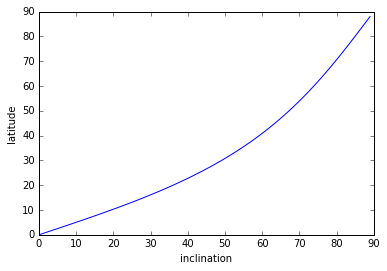

In [13]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [18]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

[ 103.00072744]


## Generate and plot Fisher distributed unit vectors from a specified distribution

In [60]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,191.540970,27.311607,1
1,216.292599,21.371137,1
2,206.719595,28.246059,1
3,198.066952,34.047123,1
4,210.241323,30.552909,1


In [61]:
mean = ipmag.fisher_mean(directions.dec,directions.inc)
ipmag.print_direction_mean(mean)

Dec: 199.5  Inc: 31.7
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.0
Precision parameter (k) estimate: 47.6


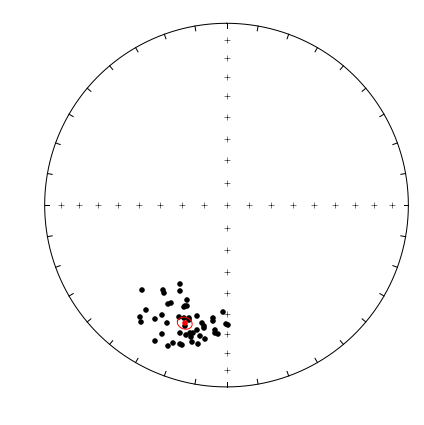

In [62]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(directions.dec,directions.inc)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')